# HW4|Problem 1
# Write a function e.g. f(x)=x^13, show that the integration is exact when n=7.

In [72]:
#Here I copy and pasted the code from class that defines gauss quad method.

""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# IntegGauss.py: Gaussian quadrature generator of pts & wts
 
from numpy import *
from sys import version    

w = zeros((2001), float)
x = zeros((2001), float)

def gauss(npts, job, a, b, x, w): # # a, b are lower and upper bound for the integration, job is three different mapping in the book
    m  = i = j = t = t1 = pp = p1 = p2 = p3 = 0.  
    eps = 3.E-15                  # Accuracy: Can be Adjusted !
    m = int((npts + 1)/2 )
    for i in range(1, m + 1):
        t = cos(math.pi*(float(i) - 0.25)/(float(npts) + 0.5) ) # initial guess of x_i
        t1 = 1 
        while( (abs(t - t1) ) >= eps):  # iteration until it converges 
            p1 = 1. ;  p2 = 0.  
            for j in range(1, npts + 1):
                p3 = p2;   p2 = p1 
                p1 = ((2.*float(j)-1)*t*p2 - (float(j)-1.)*p3)/(float(j)) # Pn using recurrence relation
            pp = npts*(t*p1 - p2)/(t*t - 1.)  # derivative using recurrence relation 
            t1 = t; t = t1  -  p1/pp       # interation to get x_i using Newton-Raphson method
        x[i - 1] = - t;   x[npts - i] = t 
        w[i - 1] = 2./( (1. - t*t)*pp*pp) 
        w[npts - i] = w[i - 1]  
    if (job == 0):
        for i in range(0, npts):
            x[i] = x[i]*(b - a)/2. + (b + a)/2. 
            w[i] = w[i]*(b - a)/2. 
    if (job == 1):
        for i in range(0, npts):
            xi   = x[i]
            x[i] = a*b*(1. + xi) / (b + a - (b - a)*xi) 
            w[i] = w[i]*2.*a*b*b/( (b + a - (b-a)*xi)*(b + a - (b-a)*xi))
    if (job == 2):
        for i in range(0, npts):
            xi = x[i]
            x[i] = (b*xi +  b + a + a) / (1. - xi) 
            w[i] = w[i]*2.*(a + b)/( (1. - xi)*(1. - xi) )
            
def gaussint (no, min, max, f):
    quadra = 0.  
    gauss (no, 0, min, max, x, w)                     # Returns pts & wts
    for n in  range(0, no):
        quadra   += f(x[n]) * w[n]                   # Calculate integral
    return (quadra)   

In [73]:
#Here I define the function of interest x^13

def f(x):
    return x**13

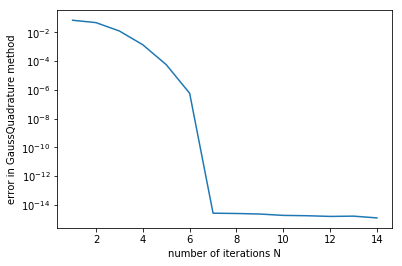

In [77]:
#The following code plots several iterations of the GaussQuad method comparing the error to the number of passes in the
#integration function. The true value was calculated manually to compare to the computer value.

import numpy as np
import pylab as p

err = []
n = []
true_value = 1/14 #This was calculated explicitly by doing the requested integral by hand
for i in range(1,15):
    err.append((abs(gaussint(i,0,1,f) - true_value)))
    n.append(i)
    
p.plot(n,err)
p.yscale('log')
p.ylabel('error in GaussQuadrature method')
p.xlabel('number of iterations N')
p.show()

#As can be seen by the graph, by the time we reach 7 iterations the results are exact to within machine precision.